# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Exploratory Data Analysis

In [3]:
data = pd.read_csv("Data/Concrete_Data_Yeh.csv")

In [4]:
len(data)

1030

In [5]:
# We have *8 input features -
# except age feature all other feature's unit is Kg/m^3
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Feature Correlation

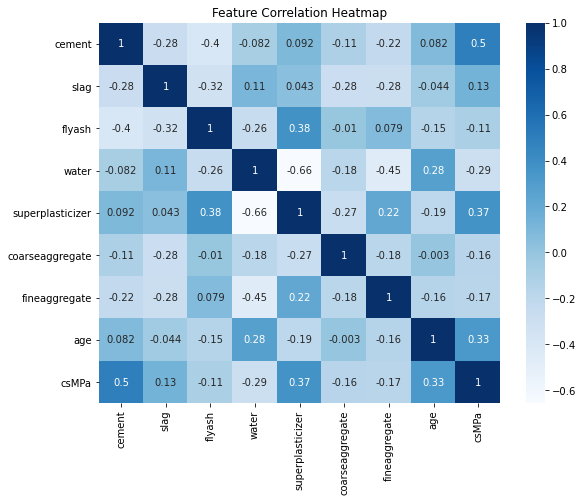

In [9]:
# To find relation between compressive strength and other features
# positive and high correlation means features are directly propotional and highly dependent
# negative correlation -- features are inversely propotional
corr = data.corr()

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, cmap='Blues') #annot -- an array of same data which is used to annotate the heatmap
#b, t = plt.ylim() # ylim- function that used to y-limits of current axes
#plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# our observation-
# 1) cement is highly correlated with strength (case for more strength)
# 2) after cement age and superplasticizer are strongly correlated
# 3) super plasticizer have negative correlation with water.

Text(0.5, 1.0, 'Compressive Strength Distribution')

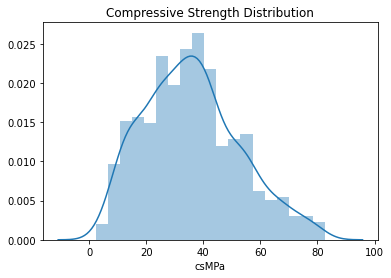

In [10]:
# for checking distribution of compressive strength -- we use distplot
ax = sns.distplot(data.csMPa)
ax.set_title("Compressive Strength Distribution")

# Visualizing Correlation using Scatter Plot

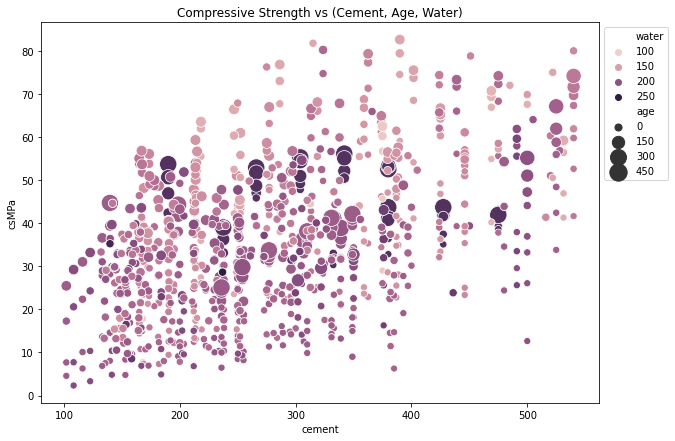

In [11]:
# Scatter plots show how much one variable is affected by another or correlation
# and we can also see other features ,how they are related

# hue-- grouping variable that will produce points with colors
# size-- grouping variable that will produce points with size

fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="cement", hue="water", size="age", data=data, ax=ax, sizes=(50, 300) )
ax.set_title("Compressive Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()


#Observations-
# Compressive strength increases with amount of cement
# Compressive strength increases with age
# Cement with low age requires more cement for higher strength
# The older the cement is the more water it requires
# Concrete strength increases when less water is used in preparing it

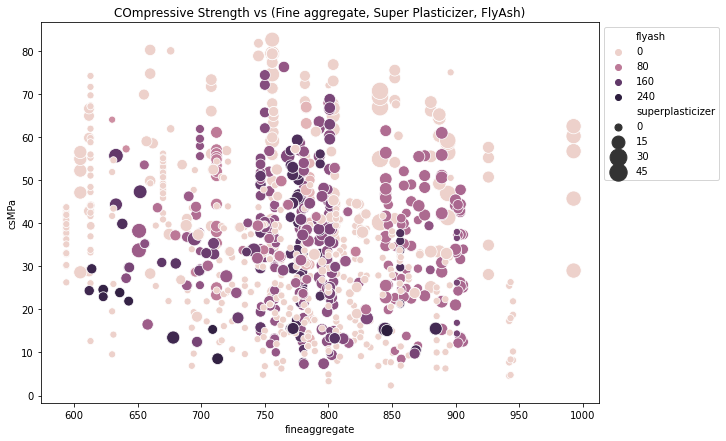

In [12]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="flyash", size="superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("COmpressive Strength vs (Fine aggregate, Super Plasticizer, FlyAsh)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

# Observations
# As Flyash increases the strength decreases
# Strength increases with Super plasticize

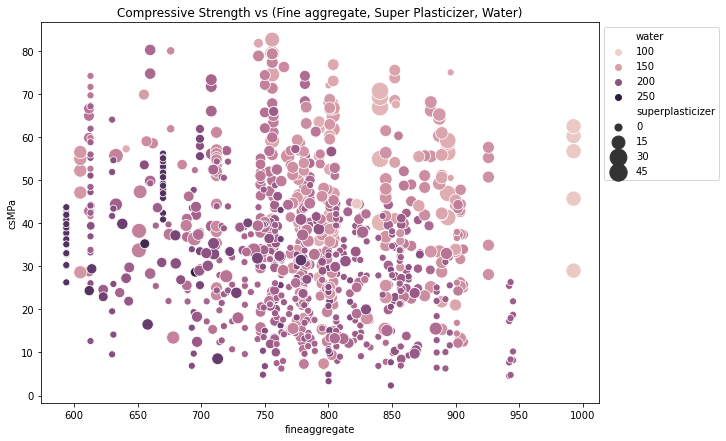

In [13]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="csMPa", x="fineaggregate", hue="water", size="superplasticizer", 
                data=data, ax=ax, sizes=(50, 300))
ax.set_title("Compressive Strength vs (Fine aggregate, Super Plasticizer, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#Observations-
# Strength decreases with increase in water, strength increases with increase in Super plasticizer (already from above plots)
# More Fine aggregate is used when less water, more Super plasticizer is used

# Spillting Data for training and testing

In [14]:
X = data.iloc[:,:-1]         # Features - All columns but last
y = data.iloc[:,-1]          # Target - Last Column

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Standarizing the training data

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection--
###  1) Strating with basic regression models like- linear regression , L1 , L2
### 2) After that we will use Tree based models - Decision tree , Random Forest , XGBoost
### 3) At last we will use Artificial Neural Network

In [17]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data 
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

# Evaluation of our model - using Evaluation Matrices

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 10.28 		 105.76 	8.23 		0.57
LassoRegression 	 10.68 		 114.11 	8.65 		0.54
RidgeRegression 	 10.29 		 105.84 	8.24 		0.57


# Feature coefficient or Importance of feature

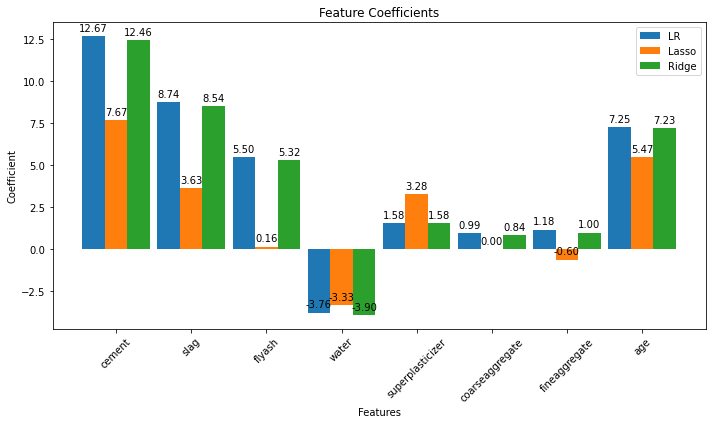

In [20]:
coeff_lr = lr.coef_
coeff_lasso = lasso.coef_
coeff_ridge = ridge.coef_

labels = data.columns[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - 2*(width/2), coeff_lr, width, label='LR')
rects2 = ax.bar(x, coeff_lasso, width, label='Lasso')
rects3 = ax.bar(x + 2*(width/2), coeff_ridge, width, label='Ridge')

ax.set_ylabel('Coefficient')
ax.set_xlabel('Features')
ax.set_title('Feature Coefficients')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# Plotting Between True value and Predicted Value

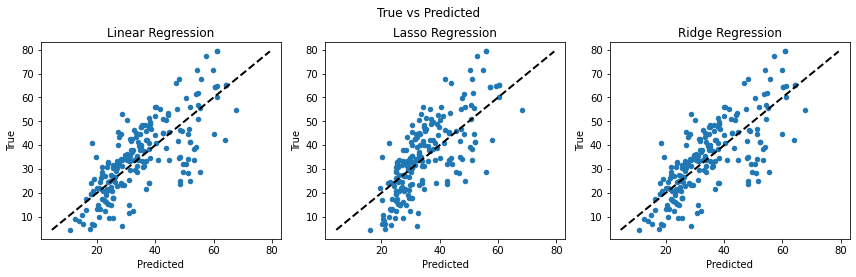

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Decision Tree

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.25 		 52.59 		4.45 		0.79


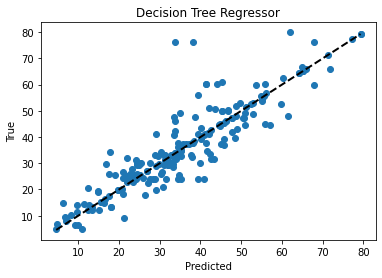

In [22]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

# Random Forest without Hyperparameter Tuning 

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.14 		 26.43 		3.52 		0.89


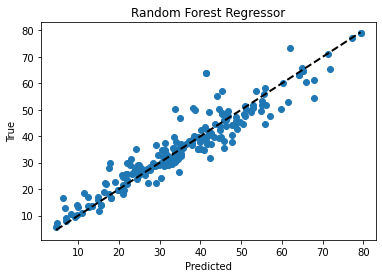

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

# XGBoost with its hyperparmeter tuning

In [24]:
import xgboost
classifier =xgboost.XGBRegressor()
classifier.fit(X_train , y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
n_estimators = [ 100 , 500 , 900 , 1100 , 1500]
max_depth = [ 2, 3, 5 , 10 , 15]
booster = ['gbtree' ,'gblinear']
learning_rate = [0.05, 0.1 , 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score =[0.25 , 0.5, 0.75 , 1]



hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'booster' : booster,
    'learning_rate': learning_rate,
    'base_score': base_score,
    'min_child_weight': min_child_weight
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
random_cv = RandomizedSearchCV(classifier,
                               hyperparameter_grid,
                              cv=5 , n_iter = 50 , 
                              scoring = 'neg_mean_absolute_error', n_jobs = 4,
                              verbose = 5 ,
                              return_train_score = True , random_state = 42)

In [29]:
random_cv.fit(X_train , y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   18.6s
[Parallel(n_jobs=4)]: Done 177 tasks      | elapsed:   32.2s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   37.9s finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=0,
                                          num_par...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_it

In [30]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
 classifier =xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
classifier.fit(X_train , y_train)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred_rfr = classifier.predict(X_test)

In [35]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 4.56 		 20.75 		2.84 		0.92


# Hyper parameter tuning of Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
n_estimators = [ 120 , 300 , 500 , 800 , 1200]
max_depth = [ 5, 8, 15 , 25 , 30 ,None]
min_samples_split = [1,2,5,10,15,100]
min_samples_leaf = [1,2,5,10]
max_features =['log2' ,'sqrt' ,None]



hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
     'max_features':max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [42]:
random_cvr = RandomizedSearchCV(rfr,
                               hyperparameter_grid,
                              cv=5 , n_iter = 50 , 
                              scoring = 'neg_mean_absolute_error', n_jobs = 4,
                              verbose = 5 ,
                              return_train_score = True , random_state = 42)

In [43]:
random_cvr.fit(X_train , y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   39.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=4,
                   param_distributions={'max_depth': [5, 8, 15, 25, 30, None],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [120, 300, 500, 800,
                                                         1200]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [44]:
random_cvr.best_estimator_

RandomForestRegressor(max_depth=15, max_features=None, n_estimators=120)

In [45]:
rfr = RandomForestRegressor(max_depth=15, max_features=None, n_estimators=120)


In [46]:
rfr.fit(X_train , y_train)

RandomForestRegressor(max_depth=15, max_features=None, n_estimators=120)

In [47]:
y_pred_rf = rfr.predict(X_test)

In [48]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rf)),mean_squared_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_rf), r2_score(y_test, y_pred_rf)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.06 		 25.64 		3.50 		0.90


# Evaluation of models based on their RMSE values

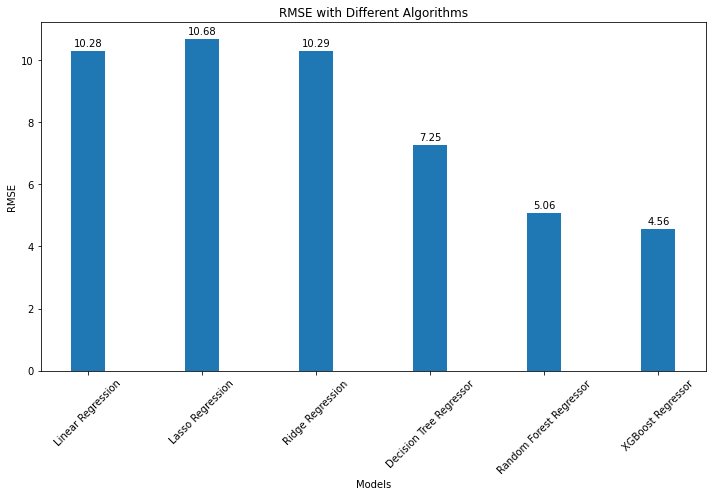

In [50]:
models = [lr, lasso, ridge, dtr, rfr , classifier]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor" , "XGBoost Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# Feature Importance using Tree Based models

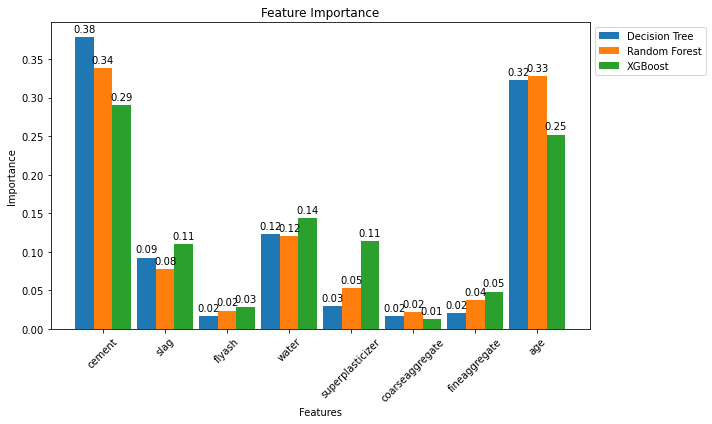

In [57]:
feature_dtr = dtr.feature_importances_
feature_rfr = rfr.feature_importances_
feature_classifier = classifier.feature_importances_

labels = data.columns[:-1]

x = np.arange(len(labels)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x-2*(width/2), feature_dtr, width, label='Decision Tree')
rects2 = ax.bar(x, feature_rfr, width, label='Random Forest')
rects3 = ax.bar(x+2*(width/2), feature_classifier, width, label='XGBoost')


ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

# ANN-

In [58]:
from keras import backend as K
def root_mean_squared_error(y_true , y_pred):
    return K.sqrt(K.mean(K.square(y_pred-y_true)))

In [63]:
# importing keras libraies and packages 
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU , PReLU , ELU
from keras.layers import Dropout

# Initializing ANN 
classify = Sequential()

# Adding the input layer and first hidden layer
# Weight initialization technique - he_uniform
# units = output dimension
classify.add(Dense( units =50 , kernel_initializer = 'he_uniform' , activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classify.add(Dense(units =25 , kernel_initializer = 'he_uniform' , activation ='relu'))

# Adding third hidden layer 
classify.add(Dense(units = 50 , kernel_initializer = 'he_uniform' , activation ='relu'))

# Adding the output layer
classify.add(Dense(units =1 , kernel_initializer ='he_uniform'))

# Compiling the ANN
classify.compile(loss = root_mean_squared_error , optimizer = 'Adamax')
# Fitting the ANN to the training set
model_history =  classify.fit(X_train, y_train , validation_split=0.20 , batch_size = 10 , epochs = 1500)

Epoch 1/1500
66/66 [==============================] - 0s 7ms/step - loss: 38.2869 - val_loss: 34.6898
Epoch 2/1500
66/66 [==============================] - 0s 2ms/step - loss: 33.1849 - val_loss: 27.3125
Epoch 3/1500
66/66 [==============================] - 0s 2ms/step - loss: 24.0075 - val_loss: 16.7282
Epoch 4/1500
66/66 [==============================] - 0s 2ms/step - loss: 17.2181 - val_loss: 14.2963
Epoch 5/1500
66/66 [==============================] - 0s 2ms/step - loss: 15.9819 - val_loss: 13.8026
Epoch 6/1500
66/66 [==============================] - 0s 2ms/step - loss: 15.3598 - val_loss: 13.4709
Epoch 7/1500
66/66 [==============================] - 0s 2ms/step - loss: 14.8782 - val_loss: 13.2599
Epoch 8/1500
66/66 [==============================] - 0s 2ms/step - loss: 14.6815 - val_loss: 13.0891
Epoch 9/1500
66/66 [==============================] - 0s 2ms/step - loss: 14.2639 - val_loss: 12.9458
Epoch 10/1500
66/66 [==============================] - 0s 2ms/step - loss: 14.0719

66/66 [==============================] - 0s 2ms/step - loss: 5.3538 - val_loss: 6.6364
Epoch 82/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.2946 - val_loss: 6.5306
Epoch 83/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.2244 - val_loss: 6.5188
Epoch 84/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.3080 - val_loss: 6.5234
Epoch 85/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.3353 - val_loss: 6.4419
Epoch 86/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.2101 - val_loss: 6.4363
Epoch 87/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.1724 - val_loss: 6.4180
Epoch 88/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.1115 - val_loss: 6.4049
Epoch 89/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.0960 - val_loss: 6.4029
Epoch 90/1500
66/66 [==============================] - 0s 2ms/step - loss: 5.1454 - val_loss: 6.3676
Epoc

66/66 [==============================] - 0s 2ms/step - loss: 3.8228 - val_loss: 5.7904
Epoch 162/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.8519 - val_loss: 5.8466
Epoch 163/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.7996 - val_loss: 5.7555
Epoch 164/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.7569 - val_loss: 5.8461
Epoch 165/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.8101 - val_loss: 5.7493
Epoch 166/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.7986 - val_loss: 5.6983
Epoch 167/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.8088 - val_loss: 5.7744
Epoch 168/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.7485 - val_loss: 5.7726
Epoch 169/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.7876 - val_loss: 5.7531
Epoch 170/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.7050 - val_loss: 5.

66/66 [==============================] - 0s 3ms/step - loss: 3.2519 - val_loss: 5.6258
Epoch 242/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.3206 - val_loss: 5.6007
Epoch 243/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.3185 - val_loss: 5.5849
Epoch 244/1500
66/66 [==============================] - 0s 3ms/step - loss: 3.3463 - val_loss: 5.6037
Epoch 245/1500
66/66 [==============================] - 0s 3ms/step - loss: 3.3088 - val_loss: 5.6179
Epoch 246/1500
66/66 [==============================] - 0s 3ms/step - loss: 3.3187 - val_loss: 5.5984
Epoch 247/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.2415 - val_loss: 5.6449
Epoch 248/1500
66/66 [==============================] - 0s 3ms/step - loss: 3.3114 - val_loss: 5.5673
Epoch 249/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.3158 - val_loss: 5.5467
Epoch 250/1500
66/66 [==============================] - 0s 3ms/step - loss: 3.2527 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 3.0079 - val_loss: 5.4937
Epoch 322/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.0067 - val_loss: 5.4897
Epoch 323/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.9483 - val_loss: 5.5381
Epoch 324/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.9615 - val_loss: 5.4740
Epoch 325/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.9338 - val_loss: 5.5706
Epoch 326/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.0590 - val_loss: 5.5307
Epoch 327/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.0347 - val_loss: 5.4410
Epoch 328/1500
66/66 [==============================] - 0s 2ms/step - loss: 3.0394 - val_loss: 5.4769
Epoch 329/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.9441 - val_loss: 5.4499
Epoch 330/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.9296 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 2.7760 - val_loss: 5.3611
Epoch 402/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7232 - val_loss: 5.4040
Epoch 403/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.8203 - val_loss: 5.3526
Epoch 404/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7395 - val_loss: 5.4404
Epoch 405/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7497 - val_loss: 5.4304
Epoch 406/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7113 - val_loss: 5.3292
Epoch 407/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7296 - val_loss: 5.3623
Epoch 408/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7581 - val_loss: 5.4675
Epoch 409/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7110 - val_loss: 5.4629
Epoch 410/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.7656 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 2.6028 - val_loss: 5.3136
Epoch 482/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5212 - val_loss: 5.3663
Epoch 483/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5989 - val_loss: 5.4196
Epoch 484/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5785 - val_loss: 5.3486
Epoch 485/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.6107 - val_loss: 5.3020
Epoch 486/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.6286 - val_loss: 5.4496
Epoch 487/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5461 - val_loss: 5.3429
Epoch 488/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5308 - val_loss: 5.3828
Epoch 489/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5151 - val_loss: 5.3394
Epoch 490/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5970 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 2.4644 - val_loss: 5.4328
Epoch 562/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.4198 - val_loss: 5.4376
Epoch 563/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.5100 - val_loss: 5.4313
Epoch 564/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3623 - val_loss: 5.4263
Epoch 565/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.4862 - val_loss: 5.4136
Epoch 566/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3946 - val_loss: 5.4399
Epoch 567/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3722 - val_loss: 5.4418
Epoch 568/1500
66/66 [==============================] - 0s 3ms/step - loss: 2.4280 - val_loss: 5.4801
Epoch 569/1500
66/66 [==============================] - 0s 3ms/step - loss: 2.4183 - val_loss: 5.3768
Epoch 570/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3833 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 2.3116 - val_loss: 5.4105
Epoch 642/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.4576 - val_loss: 5.3726
Epoch 643/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2874 - val_loss: 5.4228
Epoch 644/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2726 - val_loss: 5.3774
Epoch 645/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3114 - val_loss: 5.4535
Epoch 646/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3681 - val_loss: 5.5181
Epoch 647/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3090 - val_loss: 5.4643
Epoch 648/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3282 - val_loss: 5.4211
Epoch 649/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3267 - val_loss: 5.4335
Epoch 650/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.3431 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 2.2257 - val_loss: 5.3503
Epoch 722/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2284 - val_loss: 5.3258
Epoch 723/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2734 - val_loss: 5.3589
Epoch 724/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1807 - val_loss: 5.4011
Epoch 725/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2455 - val_loss: 5.3247
Epoch 726/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2620 - val_loss: 5.2746
Epoch 727/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2350 - val_loss: 5.3867
Epoch 728/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2172 - val_loss: 5.3584
Epoch 729/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1804 - val_loss: 5.3669
Epoch 730/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.2529 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 2.1670 - val_loss: 5.2641
Epoch 802/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1391 - val_loss: 5.2585
Epoch 803/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1248 - val_loss: 5.3099
Epoch 804/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1125 - val_loss: 5.2775
Epoch 805/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0755 - val_loss: 5.3328
Epoch 806/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1170 - val_loss: 5.3367
Epoch 807/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1328 - val_loss: 5.2505
Epoch 808/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1105 - val_loss: 5.2835
Epoch 809/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0198 - val_loss: 5.3260
Epoch 810/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0875 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 2.1034 - val_loss: 5.2720
Epoch 882/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0170 - val_loss: 5.1681
Epoch 883/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0247 - val_loss: 5.2060
Epoch 884/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0994 - val_loss: 5.2353
Epoch 885/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9926 - val_loss: 5.2688
Epoch 886/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0414 - val_loss: 5.2674
Epoch 887/1500
66/66 [==============================] - 0s 3ms/step - loss: 2.0513 - val_loss: 5.2183
Epoch 888/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0318 - val_loss: 5.2953
Epoch 889/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0426 - val_loss: 5.2777
Epoch 890/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0967 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 1.9481 - val_loss: 5.2711
Epoch 962/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9727 - val_loss: 5.4096
Epoch 963/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.1445 - val_loss: 5.2860
Epoch 964/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9845 - val_loss: 5.2776
Epoch 965/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0154 - val_loss: 5.2580
Epoch 966/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0260 - val_loss: 5.3353
Epoch 967/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9842 - val_loss: 5.3239
Epoch 968/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9774 - val_loss: 5.2251
Epoch 969/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9997 - val_loss: 5.2792
Epoch 970/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9684 - val_loss: 5.

66/66 [==============================] - 0s 2ms/step - loss: 1.9332 - val_loss: 5.2376
Epoch 1042/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9492 - val_loss: 5.2408
Epoch 1043/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9142 - val_loss: 5.2328
Epoch 1044/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9670 - val_loss: 5.2549
Epoch 1045/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9937 - val_loss: 5.2086
Epoch 1046/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9787 - val_loss: 5.2138
Epoch 1047/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9938 - val_loss: 5.2094
Epoch 1048/1500
66/66 [==============================] - 0s 2ms/step - loss: 2.0195 - val_loss: 5.2410
Epoch 1049/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9671 - val_loss: 5.1878
Epoch 1050/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9672 - val

66/66 [==============================] - 0s 3ms/step - loss: 1.9043 - val_loss: 5.2758
Epoch 1121/1500
66/66 [==============================] - 0s 3ms/step - loss: 2.0146 - val_loss: 5.2870
Epoch 1122/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.9393 - val_loss: 5.2616
Epoch 1123/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.8537 - val_loss: 5.2389
Epoch 1124/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.9314 - val_loss: 5.2378
Epoch 1125/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.8922 - val_loss: 5.2522
Epoch 1126/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.9006 - val_loss: 5.2399
Epoch 1127/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.8384 - val_loss: 5.2788
Epoch 1128/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9247 - val_loss: 5.2515
Epoch 1129/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.9106 - val

66/66 [==============================] - 0s 2ms/step - loss: 1.8051 - val_loss: 5.2476
Epoch 1200/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8857 - val_loss: 5.2710
Epoch 1201/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8783 - val_loss: 5.2538
Epoch 1202/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8103 - val_loss: 5.2814
Epoch 1203/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8177 - val_loss: 5.2577
Epoch 1204/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9143 - val_loss: 5.2498
Epoch 1205/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8837 - val_loss: 5.3823
Epoch 1206/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9392 - val_loss: 5.2654
Epoch 1207/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8351 - val_loss: 5.2460
Epoch 1208/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.9203 - val

66/66 [==============================] - 0s 2ms/step - loss: 1.7270 - val_loss: 5.2330
Epoch 1279/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8007 - val_loss: 5.2320
Epoch 1280/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8090 - val_loss: 5.2558
Epoch 1281/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.7649 - val_loss: 5.3084
Epoch 1282/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8495 - val_loss: 5.2740
Epoch 1283/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.7416 - val_loss: 5.2594
Epoch 1284/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8896 - val_loss: 5.2703
Epoch 1285/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.7550 - val_loss: 5.2344
Epoch 1286/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8362 - val_loss: 5.2925
Epoch 1287/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8213 - val

66/66 [==============================] - 0s 3ms/step - loss: 1.7992 - val_loss: 5.3099
Epoch 1358/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.8095 - val_loss: 5.3275
Epoch 1359/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.7722 - val_loss: 5.3217
Epoch 1360/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.8075 - val_loss: 5.2248
Epoch 1361/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.7938 - val_loss: 5.3220
Epoch 1362/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.7752 - val_loss: 5.3103
Epoch 1363/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.7843 - val_loss: 5.3595
Epoch 1364/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.7959 - val_loss: 5.3134
Epoch 1365/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.8893 - val_loss: 5.3091
Epoch 1366/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.7957 - val

66/66 [==============================] - 0s 3ms/step - loss: 1.7431 - val_loss: 5.2256
Epoch 1437/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.7769 - val_loss: 5.3014
Epoch 1438/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.7504 - val_loss: 5.2686
Epoch 1439/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.7764 - val_loss: 5.3193
Epoch 1440/1500
66/66 [==============================] - 0s 3ms/step - loss: 1.8423 - val_loss: 5.2908
Epoch 1441/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8089 - val_loss: 5.3139
Epoch 1442/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.8019 - val_loss: 5.3281
Epoch 1443/1500
66/66 [==============================] - 0s 1ms/step - loss: 1.7975 - val_loss: 5.3602
Epoch 1444/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.7349 - val_loss: 5.2996
Epoch 1445/1500
66/66 [==============================] - 0s 2ms/step - loss: 1.7418 - val

In [65]:
y_pred_r = classify.predict(X_test)

In [66]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_r)),mean_squared_error(y_test, y_pred_r),
            mean_absolute_error(y_test, y_pred_r), r2_score(y_test, y_pred_r)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 6.03 		 36.41 		3.86 		0.85


# Comparision of RMSE values of all the algorithms

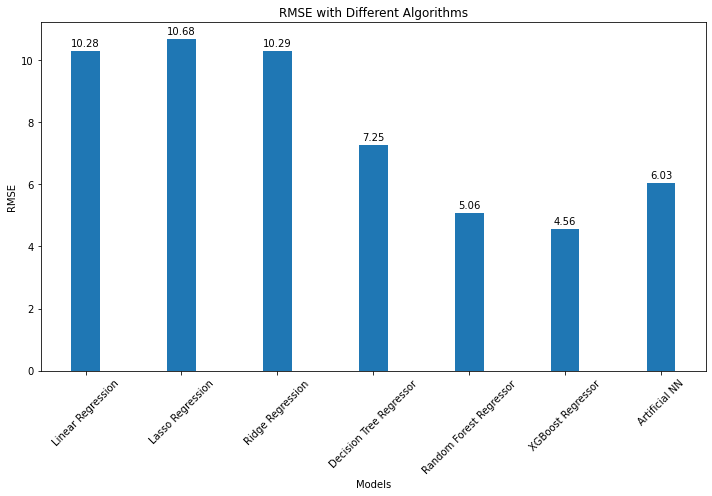

In [68]:
models = [lr, lasso, ridge, dtr, rfr , classifier  ,classify]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", 
         "Decision Tree Regressor", "Random Forest Regressor" , "XGBoost Regressor" ,  "Artificial NN"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()

# XGBoost is giving best result , so we are using that algorithm for our model

# Saving our model

In [69]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier , open(filename , 'wb'))

In [71]:
from tensorflow.keras.models import load_model
classify.save('final_model.h5')

In [75]:
xgb_model_loaded = pickle.load(open(filename, "rb"))